# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce #https://stackoverflow.com/questions/35004945/reduce-function-for-series

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(len(mouse_metadata['Mouse ID'].unique()))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.machinelearningplus.com/pandas/pandas-series-to-list/
#https://stackoverflow.com/questions/35004945/reduce-function-for-series (used for reduce)

mouse_IDandTimepoint_df = mouse_study_results.loc[:,["Mouse ID", "Timepoint"]]

duplicate_rows = mouse_IDandTimepoint_df[mouse_IDandTimepoint_df.duplicated()]
mouse_delete_list = duplicate_rows['Mouse ID'].tolist()

mouse_delete = reduce(lambda l, x: l+[x] if x not in l else l, mouse_delete_list, [])

mouse_delete  

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_stats = pd.merge(mouse_study_results, duplicate_rows, on = ["Mouse ID", "Timepoint"])

duplicate_mouse_stats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://stackoverflow.com/questions/42568050/python-pandas-remove-rows-containing-values-from-a-list

mouse_study_results = mouse_study_results[mouse_study_results['Mouse ID'].isin(mouse_delete) == False]

mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_study_results['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#https://www.statology.org/pandas-groupby-mean-and-std/

mouse_study_tumor_volume = mouse_study_results.groupby(['Drug Regimen'], as_index=True).agg({'Tumor Volume (mm3)':['mean','std','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_tumor_volume

Tumor Volume (mm3)                                         
                           mean       std        var       std       sem
Drug Regimen                                                            
Capomulin             40.675741  4.994774  24.947764  4.994774  0.329346
Ceftamin              52.591172  6.268188  39.290177  6.268188  0.469821
Infubinol             52.884795  6.567243  43.128684  6.567243  0.492236
Ketapril              55.235638  8.279709  68.553577  8.279709  0.603860
Naftisol              54.331565  8.134708  66.173479  8.134708  0.596466
Placebo               54.033581  7.821003  61.168083  7.821003  0.581331
Propriva              52.320930  6.622085  43.852013  6.622085  0.544332
Ramicane              40.216745  4.846308  23.486704  4.846308  0.320955
Stelasyn              54.233149  7.710419  59.450562  7.710419  0.573111
Zoniferol             53.236507  6.966589  48.533355  6.966589  0.516398

## Bar and Pie Charts

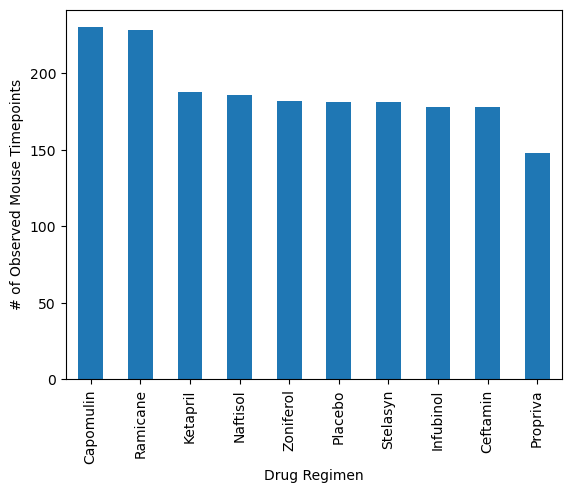

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#dchau from BCS helped to fix plot. I was overcomplicating things.

x = mouse_study_results["Drug Regimen"].value_counts()    #<---- you call the dataframe along with the column you wish to focus on. Then apply value_count. If the column contains words value count simply counts the instance each word appears. 
x.plot(kind="bar")         #<-- call the variable and then use the pandas .plot function 
 
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks()
plt.show()


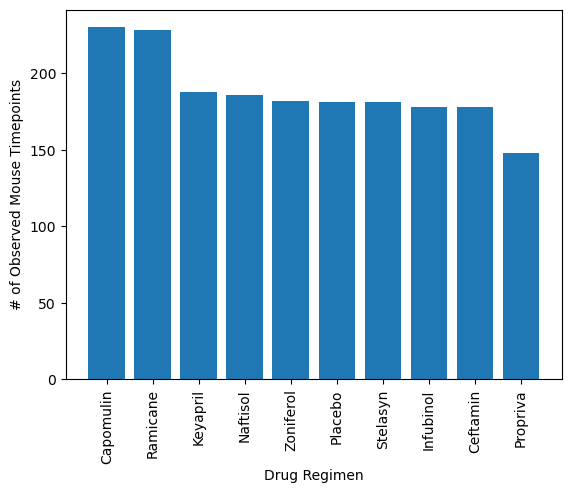

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#dchau from BCS helped to fix plot. I was overcomplicating things.

list_of_drugs = ["Capomulin","Ramicane","Keyapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"]

y = mouse_study_results["Drug Regimen"].value_counts()    #<---- you call the dataframe along with the column you wish to focus on. Then apply value_count. If the column contains words value count simply counts the instance each word appears. 
x_axis = np.arange(len(list_of_drugs))

plt.bar(x_axis, y)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_of_drugs, rotation = "vertical")


plt.show()

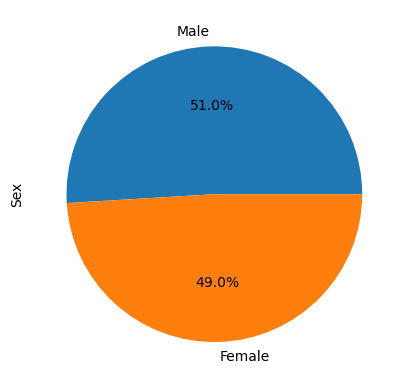

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# dchau from BCS helped to fix plot. I was overcomplicating things.
#https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
x = mouse_study_results["Sex"].value_counts()    #<---- you call the dataframe along with the column you wish to focus on. Then apply value_count. If the column contains words value count simply counts the instance each word appears. 
x.plot(kind="pie",autopct='%1.1f%%')    
plt.ylabel("Sex")

plt.show()


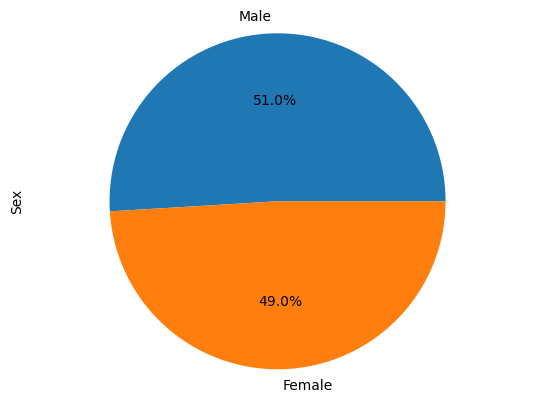

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = mouse_study_results["Sex"].value_counts()

labels = ["Male", "Female"]
plt.pie(x, labels = labels, autopct='%1.1f%%')
plt.axis("equal")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_IDandTimepoint_df = mouse_study_results.loc[:,["Mouse ID", "Timepoint"]]
last_treatment = mouse_IDandTimepoint_df.groupby("Mouse ID")['Timepoint'].max()
last_treatment_df = pd.DataFrame(last_treatment)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_treatment_stats = pd.merge(mouse_study_results, last_treatment_df, on = ["Mouse ID", "Timepoint"])

In [38]:
#Robert from BCS (rperron) helped me understand the logic on this one.
# Put treatments into a list for for loop (and later for plot labels)
#https://www.w3schools.com/statistics/statistics_quartiles_and_percentiles.php
#https://builtin.com/data-science/how-to-find-outliers-with-iqr
#https://www.askpython.com/python/examples/how-to-determine-outliers

drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_list:
    outlier_list = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x = last_treatment_stats.loc[(last_treatment_stats["Drug Regimen"] == i), "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(x)
    
    # Determine outliers using upper and lower bounds
    lowerq = np.percentile(tumor_vol_data, 25)
    upperq = np.percentile(tumor_vol_data, 75)
 
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for n in x:
        if lower_bound > n < upper_bound:  
            outlier_list.append(n)

    if outlier_list == []:
        print(f"{i}:None")
    else:
        print(f"{i}:{outlier_list}")
    
    tumor_vol_data = []
    outlier_list = []
    

Capomulin:None
Ramicane:None
Infubinol:[36.3213458]
Ceftamin:None


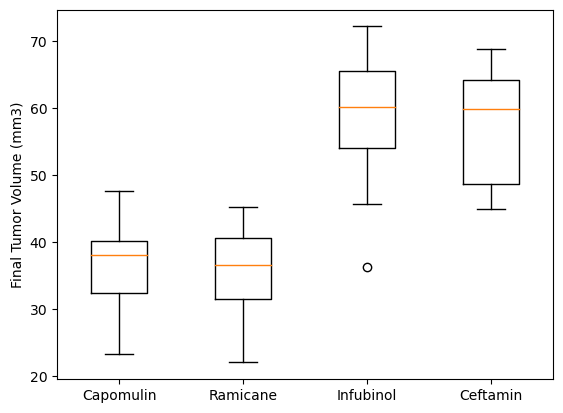

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://stackoverflow.com/questions/27061137/plot-multiple-boxplot-in-one-graph-in-pandas-or-matplotlib

cap_points = last_treatment_stats.loc[(last_treatment_stats["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]
ram_points = last_treatment_stats.loc[(last_treatment_stats["Drug Regimen"] == "Ramicane"), "Tumor Volume (mm3)"]
inf_points = last_treatment_stats.loc[(last_treatment_stats["Drug Regimen"] == "Infubinol"), "Tumor Volume (mm3)"]
cef_points = last_treatment_stats.loc[(last_treatment_stats["Drug Regimen"] == "Ceftamin"), "Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot([cap_points, ram_points, inf_points, cef_points])
plt.xticks([1, 2, 3, 4], drug_list)
plt.show()

## Line and Scatter Plots

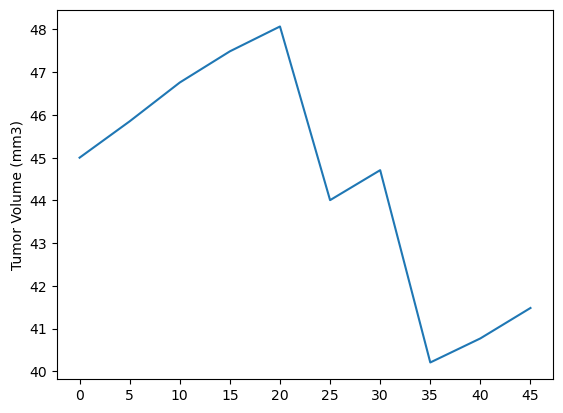

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_study_results.loc[(mouse_study_results["Mouse ID"] == "l509"), "Tumor Volume (mm3)"]
x_axis = np.arange(len(mouse_l509))

ticks = mouse_study_results.loc[(mouse_study_results["Mouse ID"] == "l509"), "Timepoint"]

plt.ylabel("Tumor Volume (mm3)")
plt.xticks(x_axis, ticks)

plt.plot(x_axis, mouse_l509)

plt.show()

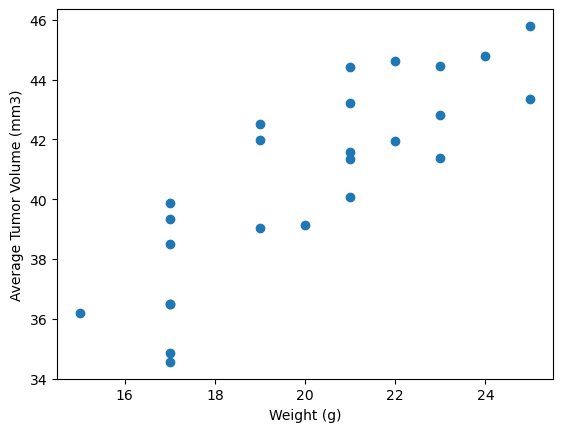

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice = mouse_study_results.loc[:,["Mouse ID","Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"]]

mice_to_plot = mice.loc[(mouse_study_results["Drug Regimen"] == "Capomulin")]
mice_cap_weight = mice_to_plot.groupby("Mouse ID")['Weight (g)'].mean()
mice_cap_tumor_avg = mice_to_plot.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()

plt.scatter(x = mice_cap_weight, y = mice_cap_tumor_avg)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


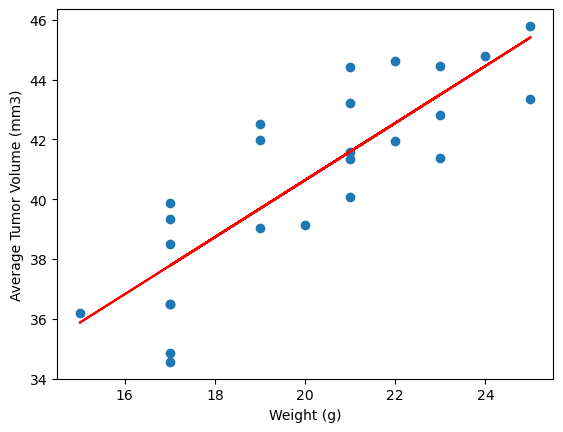

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html - line style

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(mice_cap_weight,mice_cap_tumor_avg)[0],2)}")

plt.scatter(x = mice_cap_weight, y = mice_cap_tumor_avg)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mice_cap_weight, mice_cap_tumor_avg)
m_fit = m_slope * mice_cap_weight + m_int

m_fit

plt.plot(mice_cap_weight,m_fit,"-",color='r')

plt.show()
